# Covid-19 Analysis

 **Problem Statement:**
 Given data about COVID-19 patients, write code to visualize the impact and
 analyze the trend of rate of infection and recovery as well as make predictions
 about the number of cases expected a week in future based on the current
 trends.
    
 **Dataset:**
 CSV and Excel files containing data about the number of COVID-19 confirmed
 deaths and recovered patients both around the world and in India.
    
 **Guidelines:**
 
 ● Usepandas to accumulate data from multiple data files.
 ● Useplotly (visualization library) to create interactive visualizations.
 ● UseFacebook prophet library to make time series models.
 ● Visualize the prediction by combining these technologies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("covid_19_data.csv")
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.rename(columns = {"Province/State" : "State", "Country/Region" : "Country"}, inplace=True)
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df["Date"].max()

'2020-07-27'

In [5]:
#Records from the last date
df[df["Date"] == df["Date"].max()]

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
top = df[df["Date"] == df["Date"].max()]

In [7]:
world = top.groupby("Country")["Confirmed","Active","Deaths","Recovered"].sum().reset_index()
world.head()

,Country,Confirmed,Active,Deaths,Recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242


In [8]:
total_cases = df.groupby("Date")["Date","Confirmed"].sum().reset_index()
total_cases.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [37]:
total_cases["Date"] = pd.to_datetime(total_cases["Date"])

Text(0, 0.5, 'Total Cases')

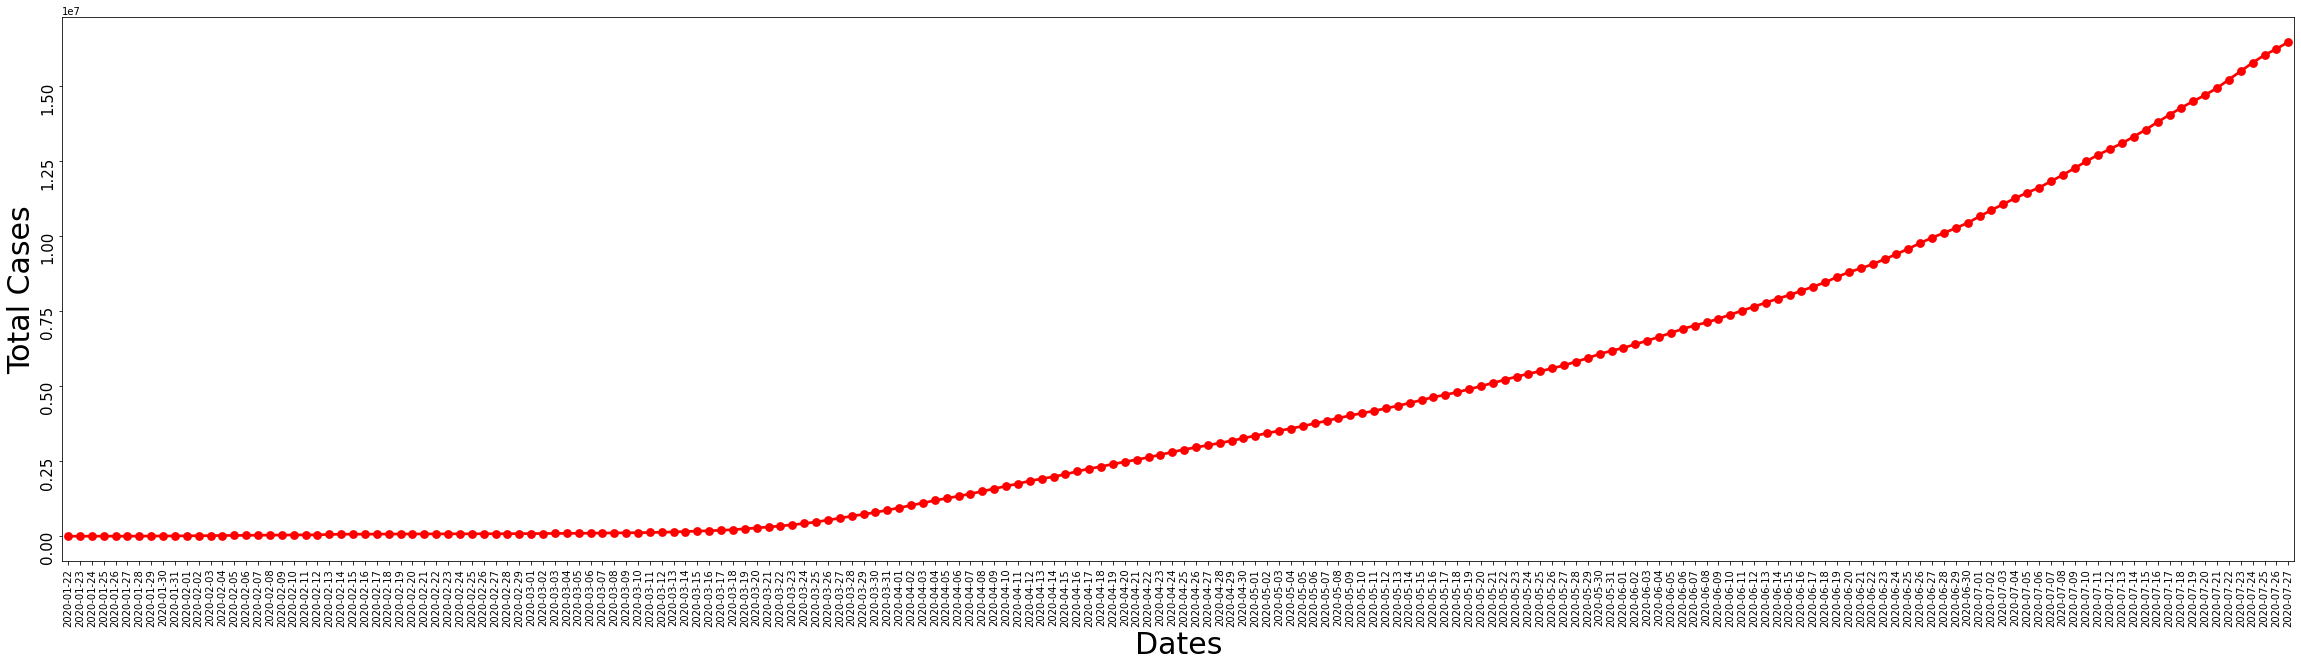

In [38]:
plt.figure(figsize = (40,10))
ax = sns.pointplot(x = total_cases.Date.dt.date, y = total_cases.Confirmed, color = "r")
ax.set(xlabel = "Date", ylabel = "Total Cases")

plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 15)

plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total Cases", fontsize = 30)

In [40]:
top_actives = top.groupby(by="Country")["Active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,Country,Active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

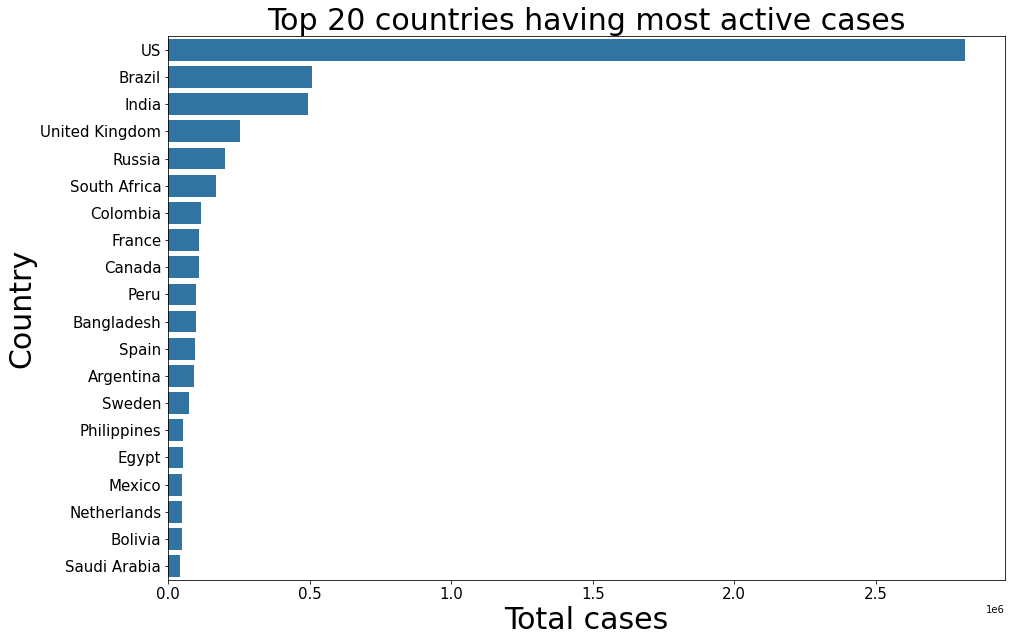

In [43]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases", fontsize=30)
plt.ylabel("Country", fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)

ax = sns.barplot(x=top_actives.Active, y=top_actives.Country)
ax.set(xlabel="Total cases",ylabel="Country")

In [9]:
top_deaths = top.groupby(by = "Country")["Deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,Country,Deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

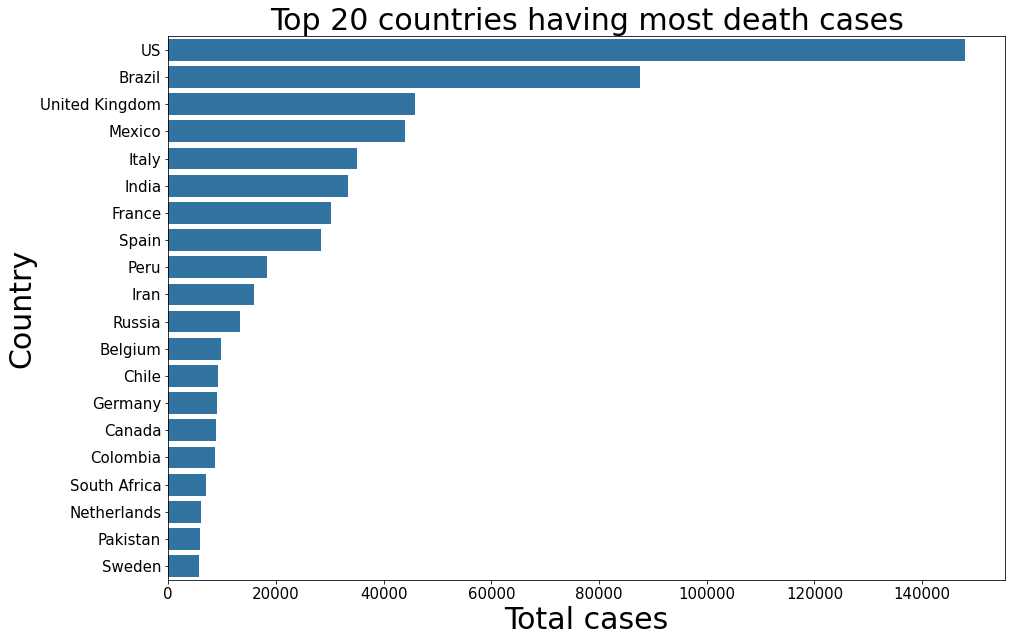

In [46]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Case", fontsize=30)
plt.ylabel("Country", fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.Deaths, y=top_deaths.Country)
ax.set(xlabel="Total cases",ylabel="Country")

In [10]:
# NUMBER OF PEOPLE RECOVERED
recovery = top.groupby(by="Country")["Recovered"].sum().sort_values(ascending=False).head(20).reset_index()
recovery

,Country,Recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

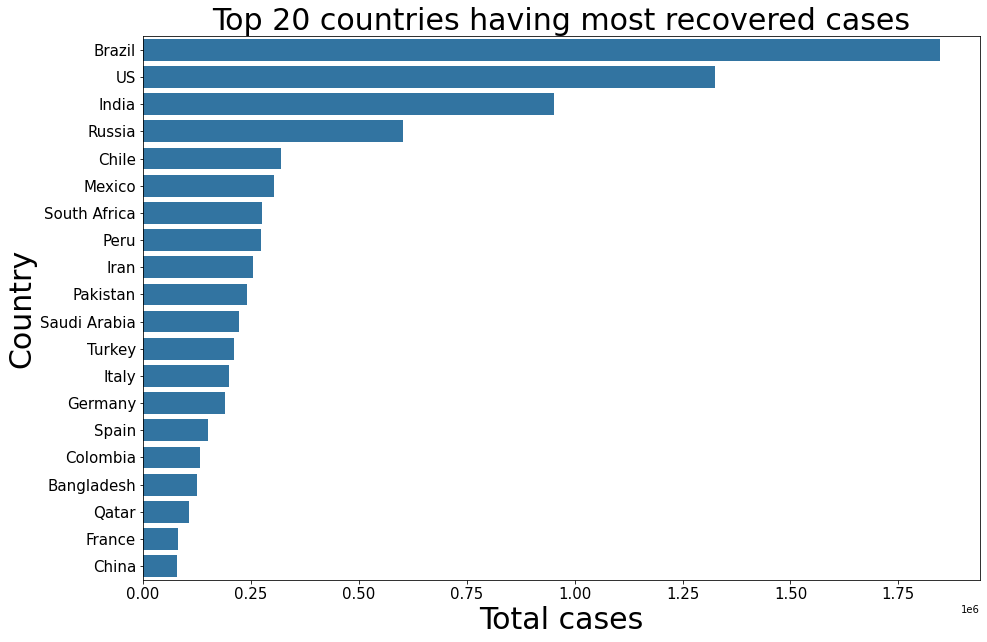

In [11]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=recovery.Recovered, y=recovery.Country)
ax.set(xlabel="Total cases",ylabel="Country")

In [12]:
#US data
us = df[df.Country == "US"]
us = us.groupby(by ="Date")["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
us

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [13]:
#Brazil
brazil = df[df.Country == "Brazil"]
brazil = brazil.groupby(by = "Date")["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
brazil.head(50)

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,0,0,0
9,2020-01-31,0,0,0,0


In [14]:
#United kingdom
uk = df[df.Country == "United Kingdom"]
uk = uk.groupby(by ="Date")["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
uk

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1425,45639,298731,251667
184,2020-07-24,1425,45762,299500,252313
185,2020-07-25,1427,45823,300270,253020
186,2020-07-26,1434,45837,301020,253749


In [15]:
#India

india = df[df.Country == "India"]
india= india.groupby(by ="Date")["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
india= india.iloc[9:].reset_index().drop("index",axis=1)
india

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-31,0,0,1,1
1,2020-02-01,0,0,1,1
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,3,3
4,2020-02-04,0,0,3,3
...,...,...,...,...,...
174,2020-07-23,817209,30601,1288108,440298
175,2020-07-24,849432,31358,1337024,456234
176,2020-07-25,885573,32060,1385635,468002
177,2020-07-26,917568,32771,1435616,485277


In [56]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [16]:
#China

China = df[df.Country == "China"]
China= india.groupby(by ="Date")["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
China

,Date,Recovered,Deaths,Confirmed,Active
0,2020-01-31,0,0,1,1
1,2020-02-01,0,0,1,1
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,3,3
4,2020-02-04,0,0,3,3
...,...,...,...,...,...
174,2020-07-23,817209,30601,1288108,440298
175,2020-07-24,849432,31358,1337024,456234
176,2020-07-25,885573,32060,1385635,468002
177,2020-07-26,917568,32771,1435616,485277


In [17]:
#Russia

Russia=df[df.Country=='Russia']
Russia=Russia.groupby(by='Date')['Recovered','Deaths','Confirmed','Active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)
Russia

,Date,Recovered,Deaths,Confirmed,Active
0,2020-02-01,0,0,2,2
1,2020-02-02,0,0,2,2
2,2020-02-03,0,0,2,2
3,2020-02-04,0,0,2,2
4,2020-02-05,0,0,2,2
...,...,...,...,...,...
173,2020-07-23,579295,12873,793720,201552
174,2020-07-24,587728,13026,799499,198745
175,2020-07-25,596064,13172,805332,196096
176,2020-07-26,599172,13249,811073,198652


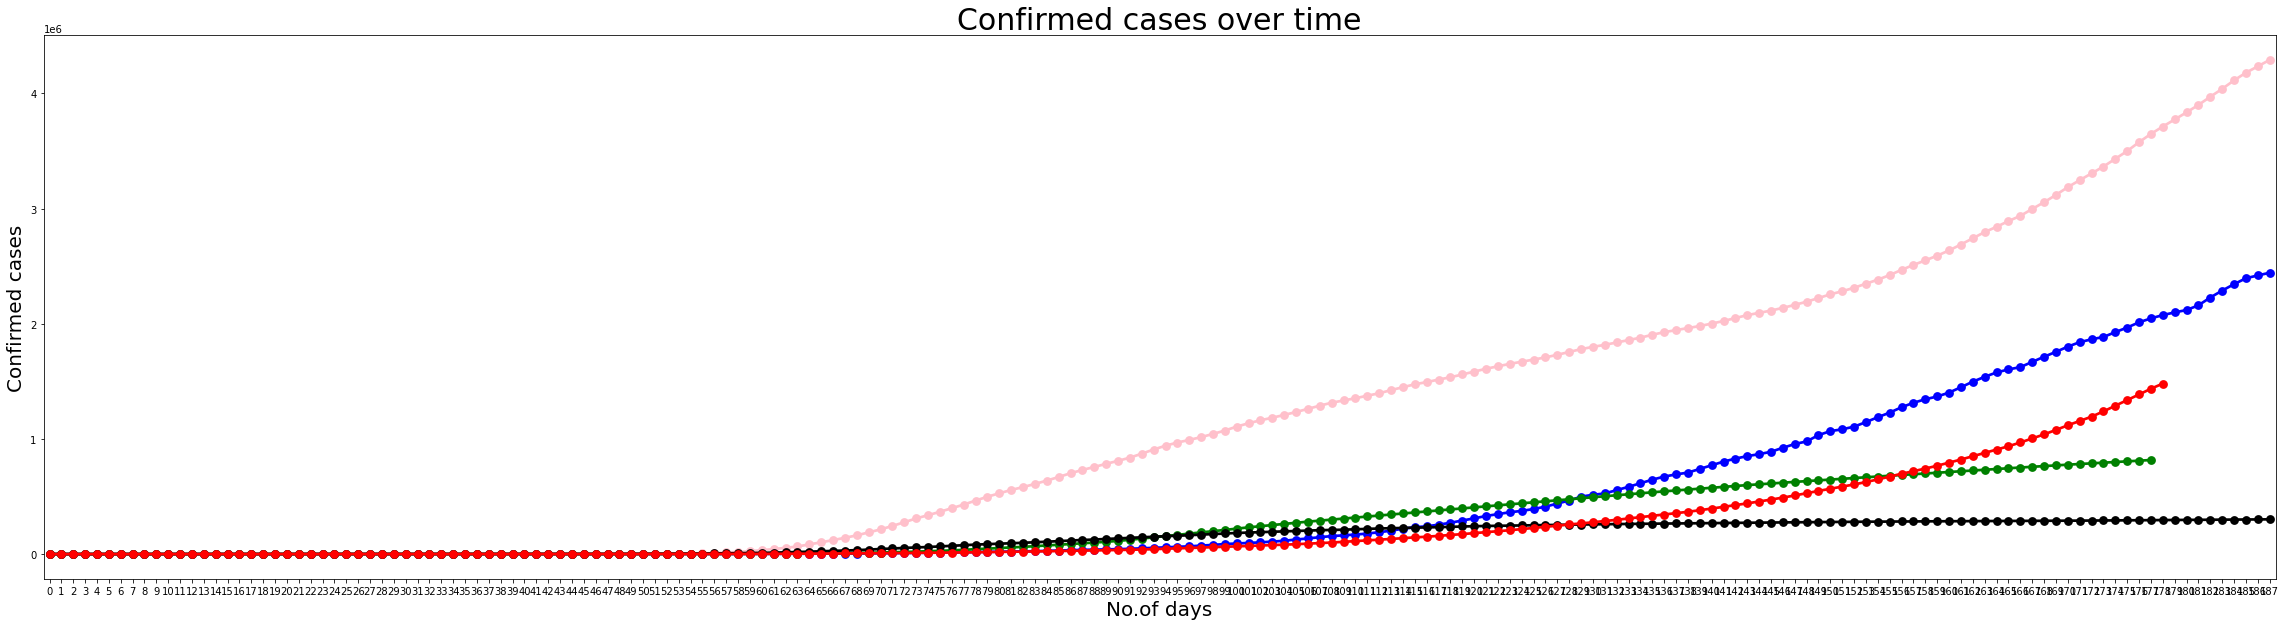

In [64]:
# confirmed cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x = brazil.index, y = brazil.Confirmed,color="Blue")
sns.pointplot(x = us.index, y = us.Confirmed,color="Pink")
sns.pointplot(x = Russia.index, y = Russia.Confirmed,color="Green")
sns.pointplot(x = uk.index, y = uk.Confirmed,color="black")
sns.pointplot(x = india.index, y = india.Confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()


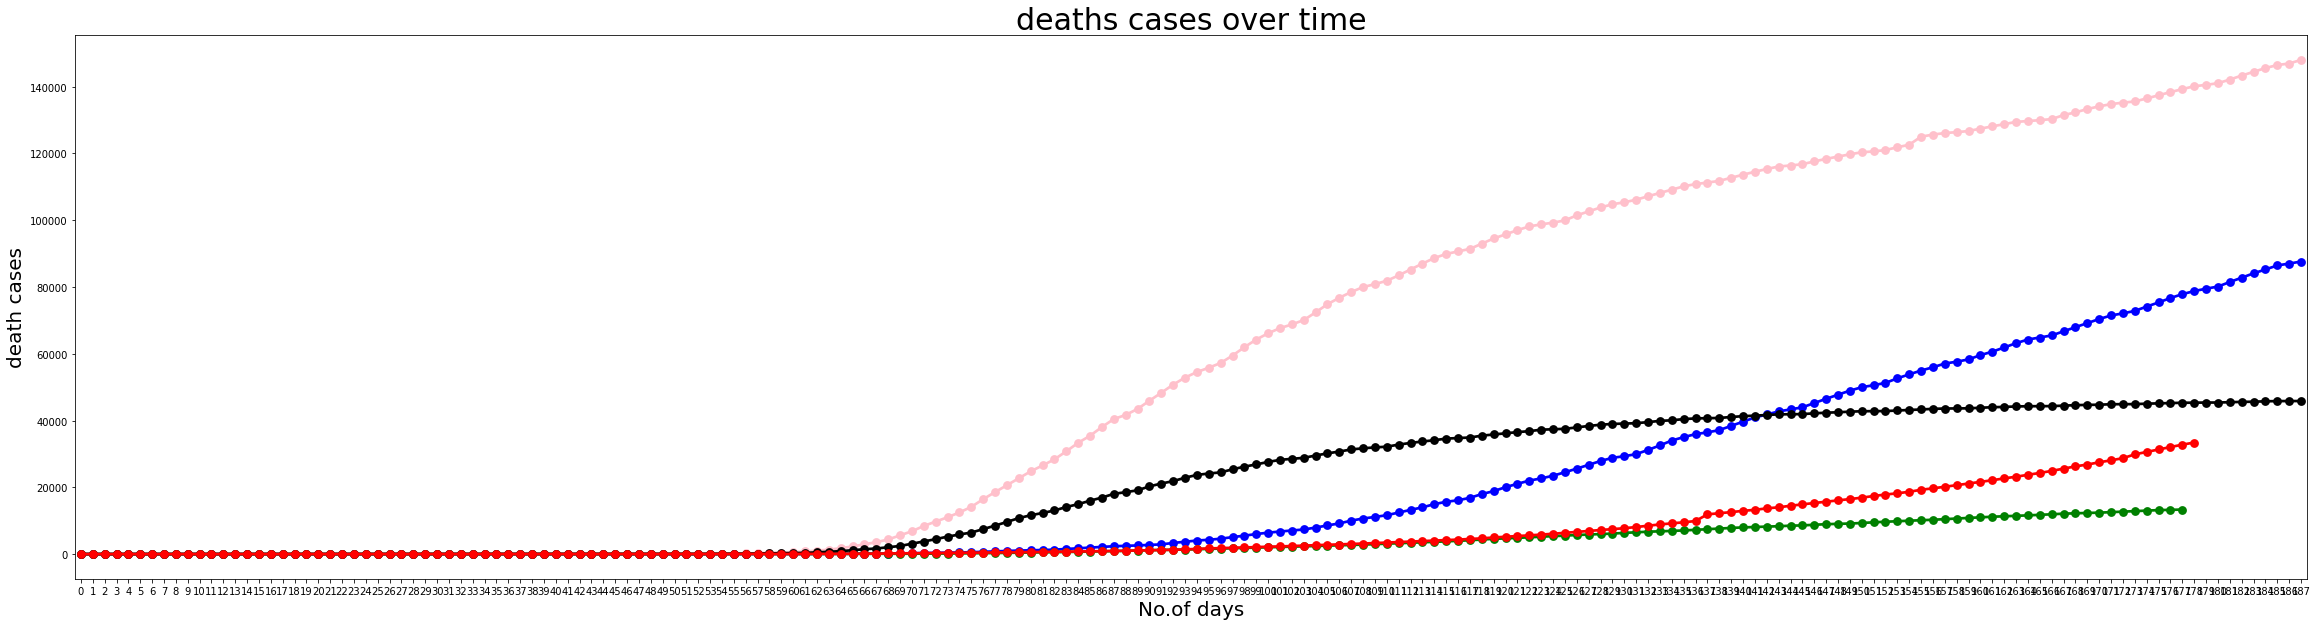

In [62]:
# Death cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x = brazil.index, y = brazil.Deaths,color="Blue")
sns.pointplot(x = us.index, y = us.Deaths,color="Pink")
sns.pointplot(x = Russia.index, y = Russia.Deaths,color="Green")
sns.pointplot(x = uk.index, y = uk.Deaths,color="black")
sns.pointplot(x = india.index, y = india.Deaths,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('death cases',fontsize=20)
plt.title('deaths cases over time',fontsize=30)
plt.show()

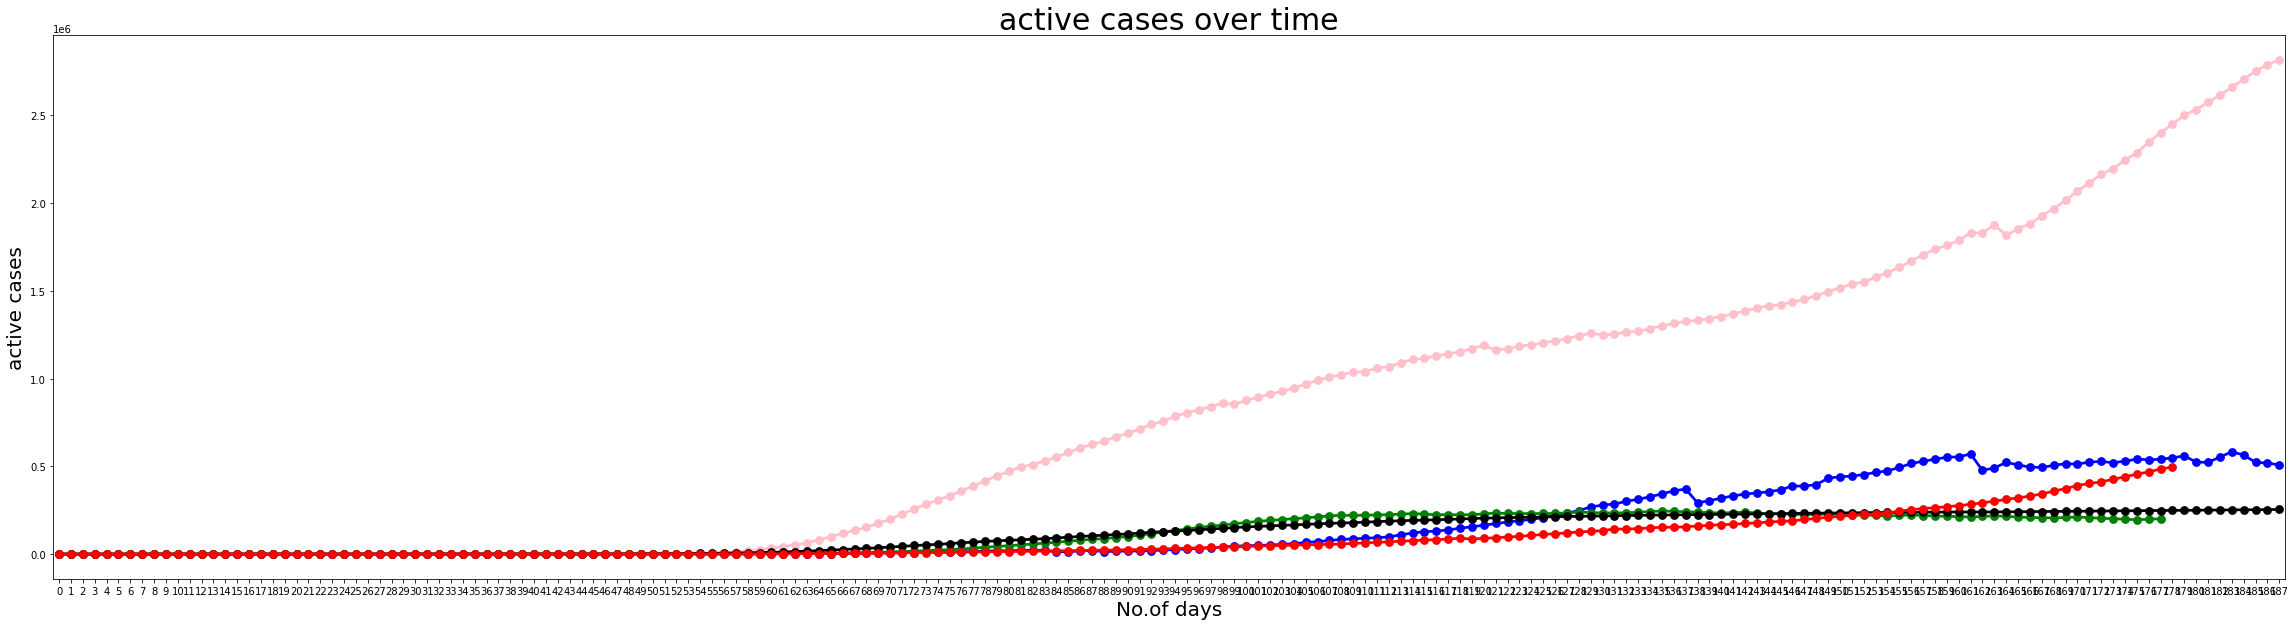

In [65]:
# active cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x = brazil.index, y = brazil.Active,color="Blue")
sns.pointplot(x = us.index, y = us.Active,color="Pink")
sns.pointplot(x = Russia.index, y = Russia.Active,color="Green")
sns.pointplot(x = uk.index, y = uk.Active,color="black")
sns.pointplot(x = india.index, y = india.Active,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('active cases',fontsize=20)
plt.title('active cases over time',fontsize=30)
plt.show()

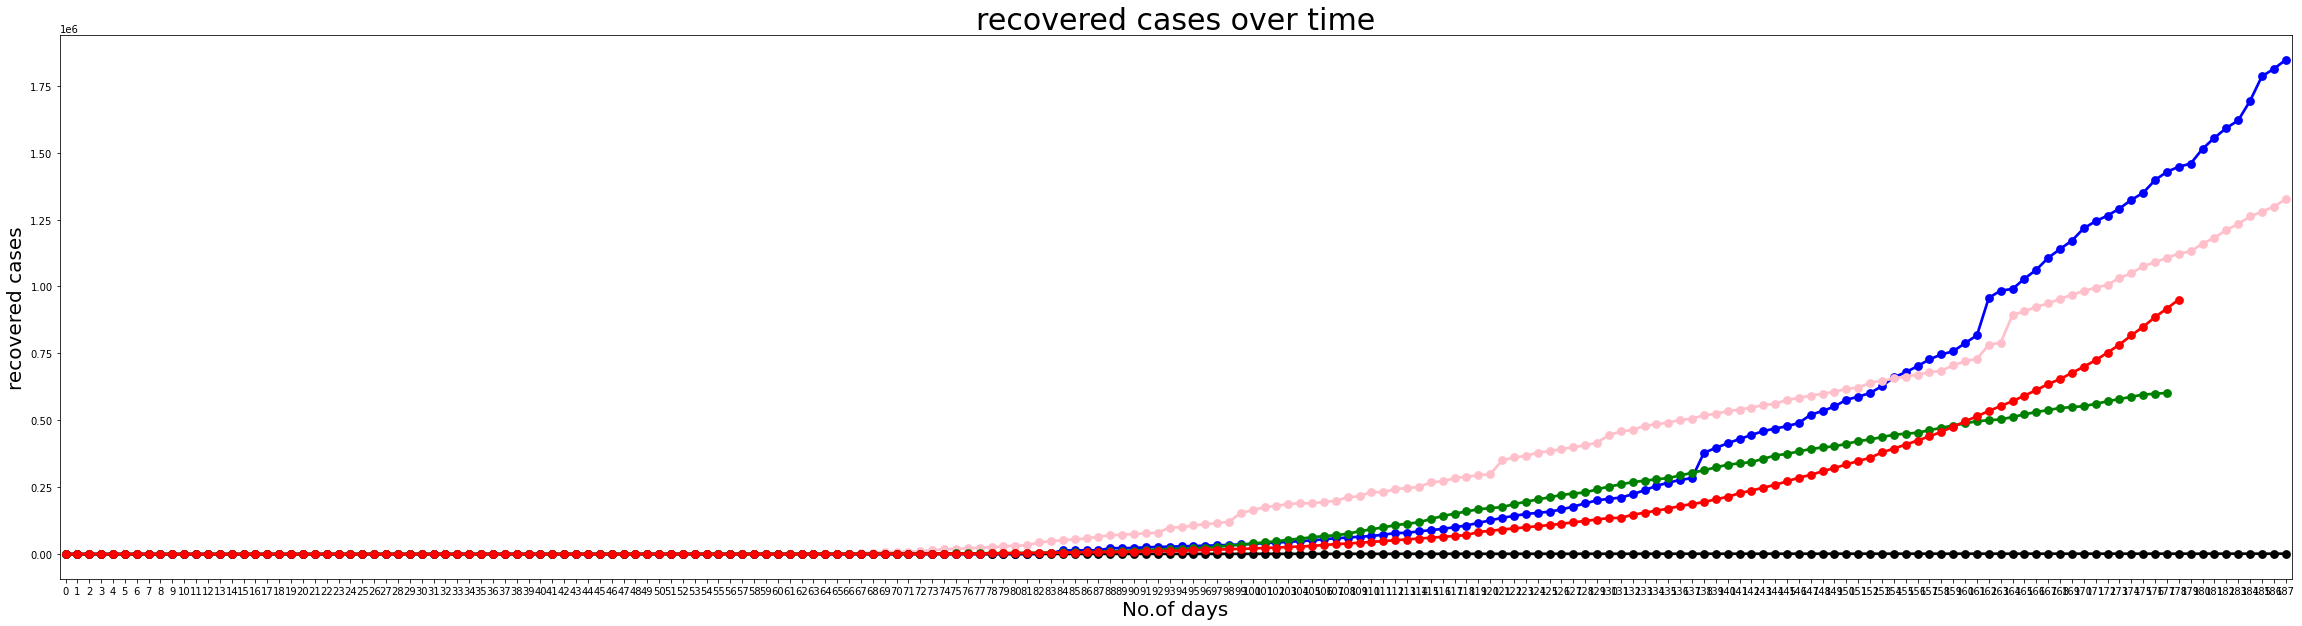

In [66]:
# recovered cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x = brazil.index, y = brazil.Recovered,color="Blue")
sns.pointplot(x = us.index, y = us.Recovered,color="Pink")
sns.pointplot(x = Russia.index, y = Russia.Recovered,color="Green")
sns.pointplot(x = uk.index, y = uk.Recovered,color="black")
sns.pointplot(x = india.index, y = india.Recovered,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('recovered cases',fontsize=20)
plt.title('recovered cases over time',fontsize=30)
plt.show()